In [275]:
import numpy as np
import pandas as pd

### Чтение файла 

In [277]:
# менять данную константу, если нужно сменить имя файла
FILE = 'try.xlsx'

In [278]:
data = pd.read_excel(FILE, index_col=0)

## 1) Фильтр отсутствия данных

In [280]:
#Константа для порогового значения, больше этого значения анкеты убираем
THRESHOLD = 0.4

Формируем набор $\phi_i $

In [281]:
logic_data = data.isnull()
ssv = logic_data.sum().sum() #сумма по всем v_ij
sv = logic_data.sum() #сумма по столбцам
#print(sv)
q_j = ssv/sv
sq_j = q_j[q_j != np.inf].sum() # стобцы со всеми заполненными строками не участвуют
#print(sq_j)

q_j[q_j == np.inf] = sq_j #костыли, чтоб бесконечности не было
Q_j = q_j / sq_j
#print(Q_j)
pheta_table = Q_j * logic_data
pheta_i = pheta_table.sum(axis=1)
pheta_i_sorted = pheta_i.sort_values(ascending=False)
pheta_i_sorted[pheta_i_sorted>THRESHOLD]

Date
2015-12-20    0.588235
2015-12-21    0.411765
dtype: float64

In [282]:
sv

X1    2
X2    0
X3    5
X4    1
dtype: int64

Визуализируем

Populating the interactive namespace from numpy and matplotlib


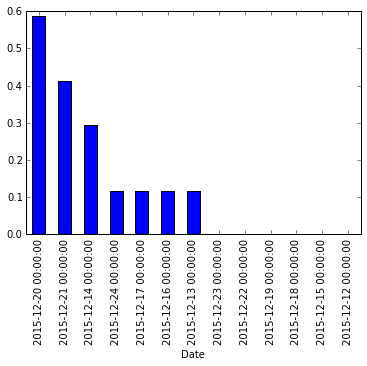

In [283]:
import matplotlib.pylab as pl
%pylab inline
pheta_i_sorted.plot(kind='bar')


##  2) Фильтр отсутствия данных групповой

Этот блок можно использовать для создания массива индексов групп пакетов

In [285]:
Nr = 5 # Количество анкет в пакете

In [286]:
ss_pheta_i = pheta_i.sum().sum()
Nr_counter = 0
N0 = len(data.index)
#делаем массив пакетов (начало, конец)
groups = []
one = []
####################################
# Делаем группы пакетов ############
def make_groups(Nr):
    groups = []
    one = []
    for row_n in range(N0):
        if (len(one) == Nr):
            groups.append(one)
            one = []
        one.append(data.index[row_n])
    else:
        if len(one)>0:
            groups.append(one) 
    return groups
####################################

Конец блока

In [287]:
Vr = []
groups = make_groups(Nr)
for group in groups:
    pheta_group = pheta_i[group]
    Wr = pheta_group.sum() / len(group)
    W_r = (ss_pheta_i -  pheta_group.sum()) / (N0 - len(group))
    Vr.append(W_r - Wr)

Визуализируем

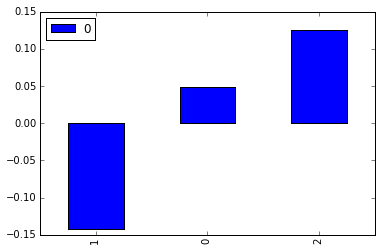

In [394]:
Vr_p = pd.DataFrame(Vr)
Vr_p = Vr_p.sort_values(by=0)
Vr_p.plot(kind='bar')

## 3) Фильтр экстремальных непрерывных значений

In [418]:
X_minus_r = []
X_r = []
groups = make_groups(Nr)
for group in groups:
    data_group = data.loc[group]
    X_r.append(data_group.mean())
    data_group_out = data.loc[(data.index < group[0]) | (data.index > group[-1])]
    X_minus_r.append(data_group_out.mean())
    
lambd = []
for i in range(len(X_r)):
    lambd.append(X_minus_r[i] - X_r[i])
    
la = pd.DataFrame(lambd)
logic = la == la.max()
Mu_i = logic.sum(axis=1)

In [419]:
THRESHOLD = 2.

Визуализируем

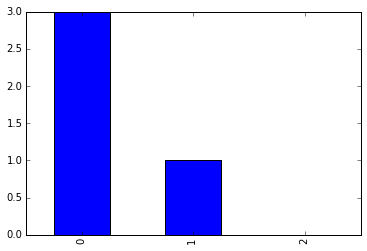

In [420]:
#Mu_p = pd.DataFrame(Mu_i)
Mu_sorted = Mu_i.sort_values(ascending=False)
Mu_sorted.plot(kind='bar')
#Mu_p[Mu_p>THRESHOLD]

## 4) Фильтр ранжирования непрерывных значений

In [423]:
M_4 = la.rank()

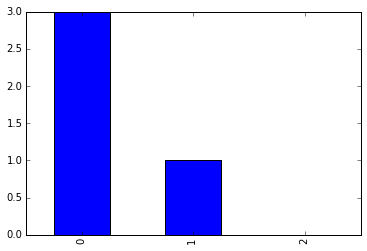

In [424]:
M_4_sorted = Mu_i.sort_values(ascending=False)
M_4_sorted.plot(kind='bar')

## 5) Фильтр метрический непрерывных значений

## 6) Фильтр частот кодирования